### Mobile Price Classification using SKLearn Custom Script in Sagemaker

# Data Loading and Initial Exploration


In [26]:
# Import necessary libraries
import sagemaker
from sklearn.model_selection import train_test_split
import boto3
import pandas as pd

# Create a SageMaker client and session
sm_boto3 = boto3.client("sagemaker") # Boto3 client for SageMaker
sess = sagemaker.Session() # SageMaker session
region = sess.boto_session.region_name # Get the current region name

# Define the S3 bucket name
bucket = 'mobbucketsagemaker2293' # Mention the created S3 bucket name here
print("Using bucket " + bucket) # Print the bucket name to verify

Using bucket mobbucketsagemaker2293


In [27]:
# Load the dataset from CSV file
df = pd.read_csv("mob_price_classification_train.csv")

In [28]:
# Display the first few rows of the dataset
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [29]:
# Check the shape of the dataset
df.shape

(2000, 21)

In [30]:
# Check the distribution of the target variable
df['price_range'].value_counts(normalize=True) # Calculate the proportion of each class in the target variable

price_range
1    0.25
2    0.25
3    0.25
0    0.25
Name: proportion, dtype: float64

In [31]:
# List of columns in the dataset
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [32]:
# Check for missing values in the dataset
df.isnull().mean() * 100

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

In [33]:
# list of features 
features = list(df.columns)
features

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [34]:
# output 
label = features.pop(-1)
label

'price_range'

In [35]:
x = df[features]
y = df[label]

## SPLIT THE DATA FOR CROSS VALIDATION 

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=0)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1700, 20)
(300, 20)
(1700,)
(300,)


In [38]:
trainX = pd.DataFrame(X_train)
trainX[label] = y_train

testX = pd.DataFrame(X_test)
testX[label] = y_test

In [39]:
trainX.to_csv("train-V-1.csv",index = False)
testX.to_csv("test-V-1.csv", index = False)

## UPLOADING DATA TO S3

In [40]:
# send data to S3. SageMaker will take training data from s3
sk_prefix = "sagemaker/mobile_price_classification/sklearncontainer"
trainpath = sess.upload_data(
    path="train-V-1.csv", bucket=bucket, key_prefix=sk_prefix
)

testpath = sess.upload_data(
    path="test-V-1.csv", bucket=bucket, key_prefix=sk_prefix
)
print(trainpath)
print(testpath)

s3://mobbucketsagemaker2293/sagemaker/mobile_price_classification/sklearncontainer/train-V-1.csv
s3://mobbucketsagemaker2293/sagemaker/mobile_price_classification/sklearncontainer/test-V-1.csv


## DATA LOADING FROM S3 AND VISUALIZATION

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1450     0          2.1         0   1       0          31    0.6   
1           1218     1          2.8         1   3       0          39    0.8   
2           1602     0          0.6         0  12       0          58    0.4   
3           1034     0          2.6         1   2       1          45    0.3   
4            530     0          2.4         0   1       0          32    0.3   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        114        5  ...       1573      1639   794    11     5          9   
1        150        7  ...       1122      1746  1667    10     0         12   
2        170        1  ...       1259      1746  3622    17     2         17   
3        190        3  ...        182      1293   969    15     1          7   
4         88        6  ...         48      1012   959    17     7          6   

   three_g  touch_screen  wifi  price_

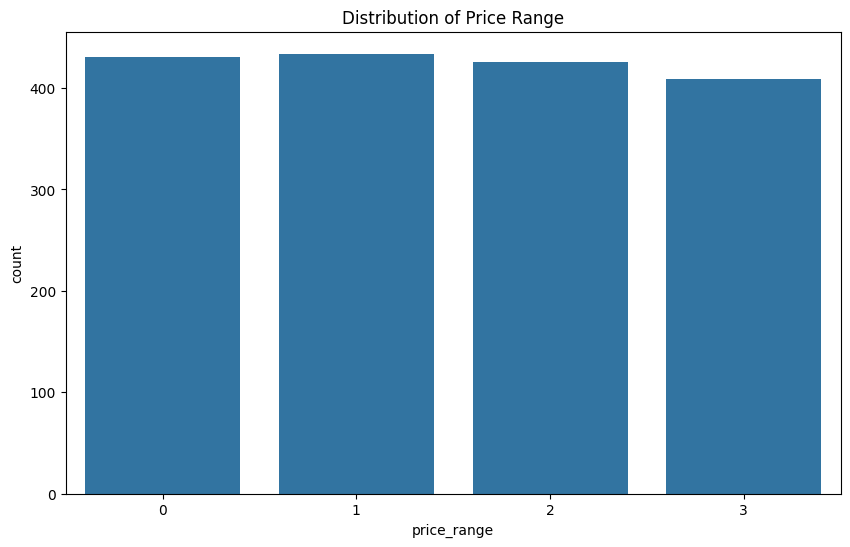

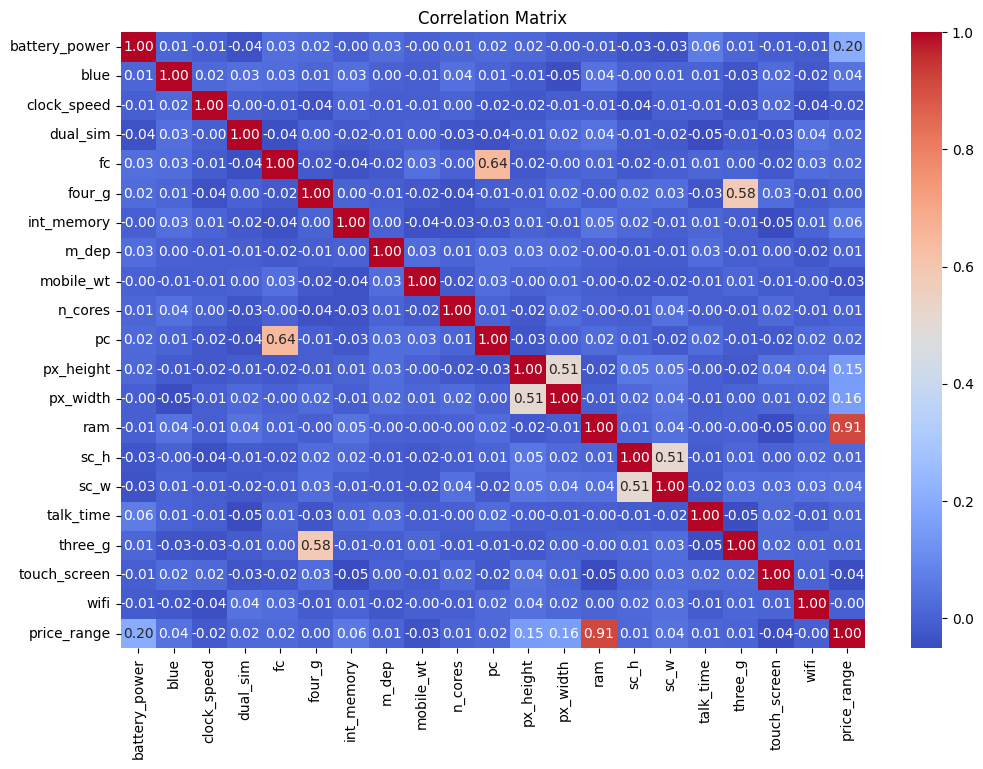

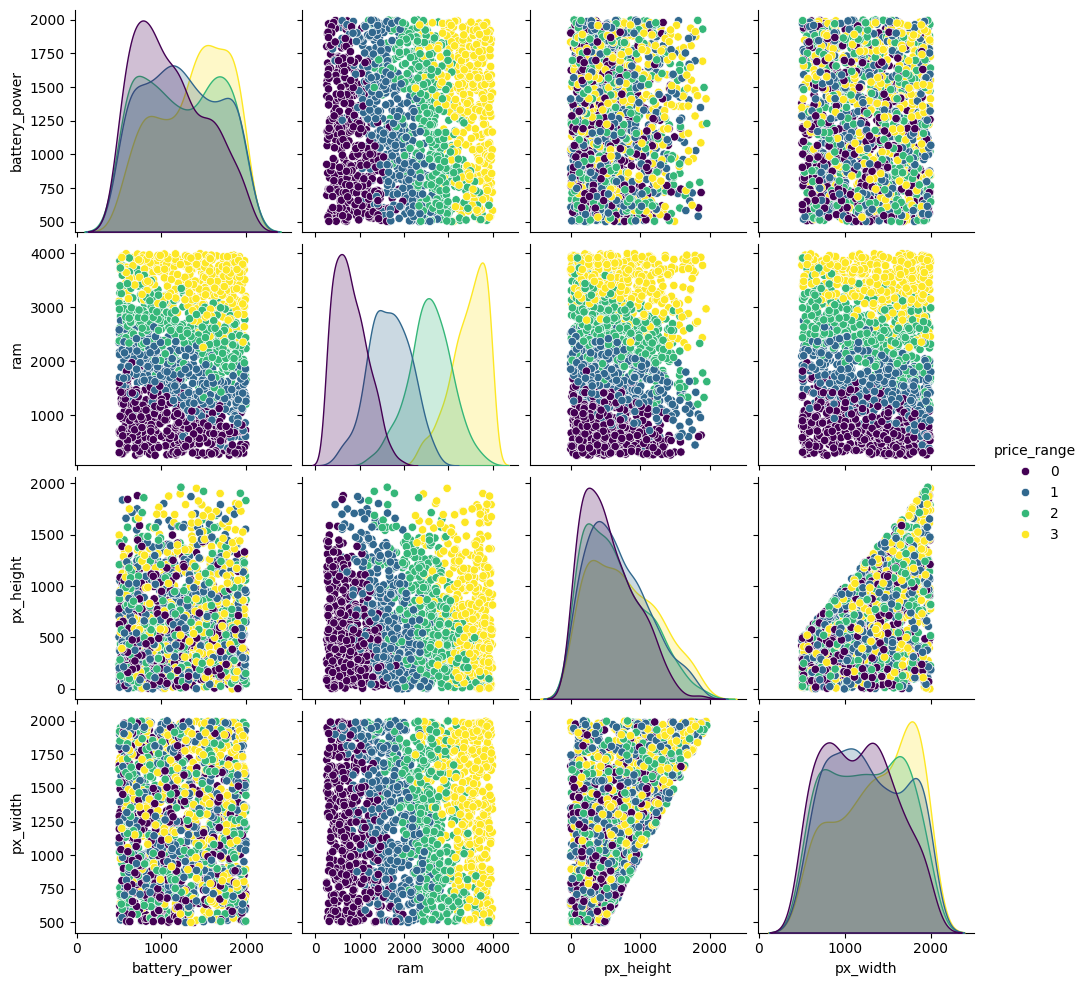

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

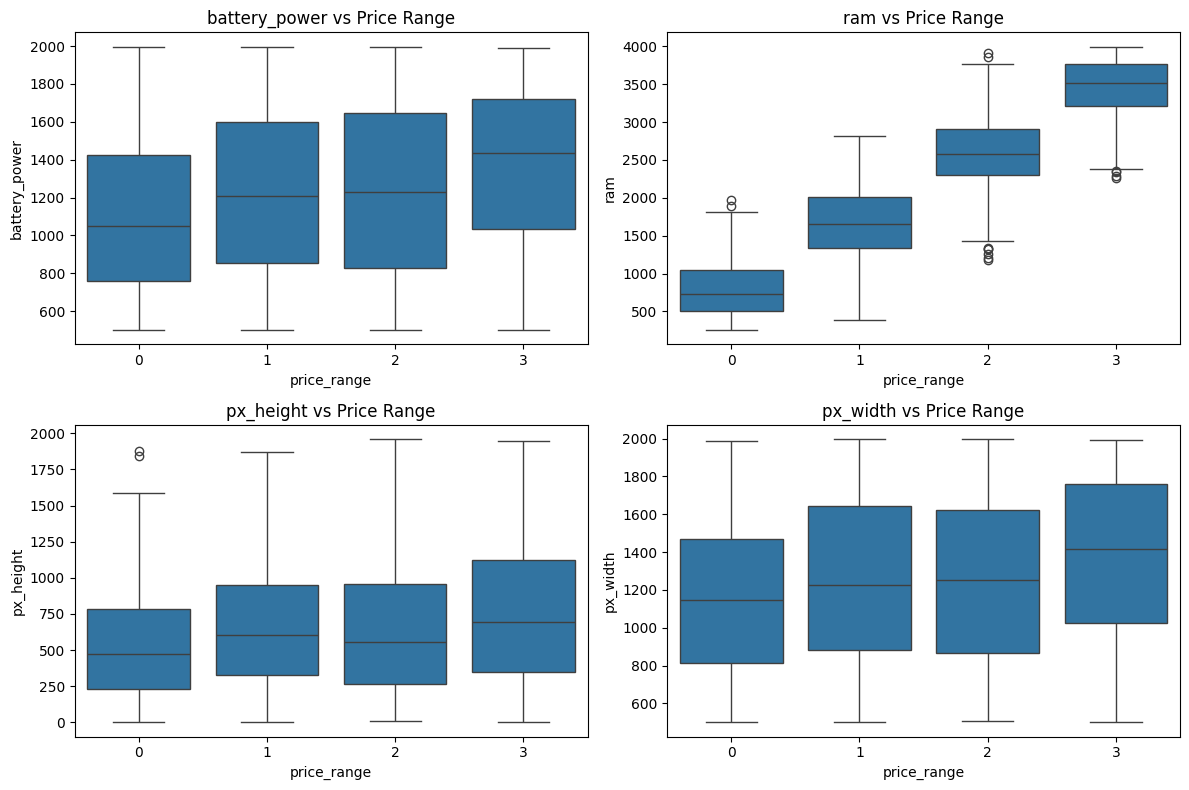

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

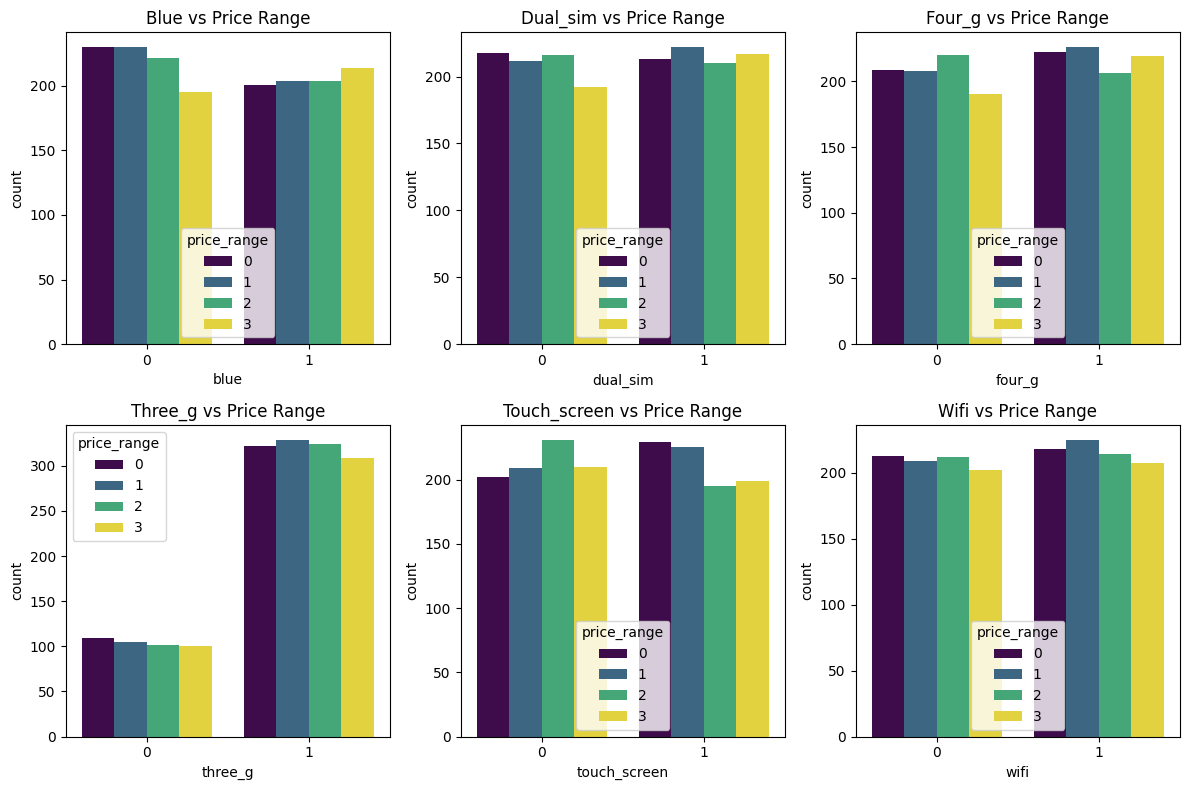

In [41]:
# Install s3fs if not already installed
!pip install s3fs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data_path = 's3://mobbucketsagemaker2293/sagemaker/mobile_price_classification/sklearncontainer/train-V-1.csv'
test_data_path = 's3://mobbucketsagemaker2293/sagemaker/mobile_price_classification/sklearncontainer/test-V-1.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Display the first few rows of the training data
print(train_data.head())

# Basic statistics of the training data
print(train_data.describe())

# Data Visualization

# Distribution of the target variable (price range)
plt.figure(figsize=(10, 6))
sns.countplot(x='price_range', data=train_data)
plt.title('Distribution of Price Range')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot of selected features
selected_features = ['battery_power', 'ram', 'px_height', 'px_width', 'price_range']
sns.pairplot(train_data[selected_features], hue='price_range', palette='viridis')
plt.show()

# Boxplots of numerical features against the target variable
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['battery_power', 'ram', 'px_height', 'px_width']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='price_range', y=feature, data=train_data)
    plt.title(f'{feature} vs Price Range')
plt.tight_layout()
plt.show()

# Count plots for categorical features
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=feature, hue='price_range', data=train_data, palette='viridis')
    plt.title(f'{feature.capitalize()} vs Price Range')
plt.tight_layout()
plt.show()


## DEFINING AND WRITING THE CUSTOM TRAINING SCRIPT

In [42]:
%%writefile script.py

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import sklearn
import joblib
import boto3
import pathlib
from io import StringIO 
import argparse
import joblib
import os
import numpy as np
import pandas as pd
    
def model_fn(model_dir):
    clf = joblib.load(os.path.join(model_dir, "model.joblib"))
    return clf
    
if __name__ == "__main__":

    print("[INFO] Extracting arguments")
    parser = argparse.ArgumentParser()

    # hyperparameters sent by the client are passed as command-line arguments to the script.
    parser.add_argument("--n_estimators", type=int, default=100)
    parser.add_argument("--random_state", type=int, default=0)

    # Data, model, and output directories
    parser.add_argument("--model-dir", type=str, default=os.environ.get("SM_MODEL_DIR"))
    parser.add_argument("--train", type=str, default=os.environ.get("SM_CHANNEL_TRAIN"))
    parser.add_argument("--test", type=str, default=os.environ.get("SM_CHANNEL_TEST"))
    parser.add_argument("--train-file", type=str, default="train-V-1.csv")
    parser.add_argument("--test-file", type=str, default="test-V-1.csv")

    args, _ = parser.parse_known_args()
    
    print("SKLearn Version: ", sklearn.__version__)
    print("Joblib Version: ", joblib.__version__)

    print("[INFO] Reading data")
    print()
    train_df = pd.read_csv(os.path.join(args.train, args.train_file))
    test_df = pd.read_csv(os.path.join(args.test, args.test_file))
    
    features = list(train_df.columns)
    label = features.pop(-1)
    
    print("Building training and testing datasets")
    print()
    X_train = train_df[features]
    X_test = test_df[features]
    y_train = train_df[label]
    y_test = test_df[label]

    print('Column order: ')
    print(features)
    print()
    
    print("Label column is: ",label)
    print()
    
    print("Data Shape: ")
    print()
    print("---- SHAPE OF TRAINING DATA (85%) ----")
    print(X_train.shape)
    print(y_train.shape)
    print()
    print("---- SHAPE OF TESTING DATA (15%) ----")
    print(X_test.shape)
    print(y_test.shape)
    print()
    
  
    print("Training RandomForest Model.....")
    print()
    model =  RandomForestClassifier(n_estimators=args.n_estimators, random_state=args.random_state, verbose = 3,n_jobs=-1)
    model.fit(X_train, y_train)
    print()
    

    model_path = os.path.join(args.model_dir, "model.joblib")
    joblib.dump(model,model_path)
    print("Model persisted at " + model_path)
    print()

    
    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test,y_pred_test)
    test_rep = classification_report(y_test,y_pred_test)

    print()
    print("---- METRICS RESULTS FOR TESTING DATA ----")
    print()
    print("Total Rows are: ", X_test.shape[0])
    print('[TESTING] Model Accuracy is: ', test_acc)
    print('[TESTING] Testing Report: ')
    print(test_rep)

Overwriting script.py


## CONFIGURING AND CREATING SKLEARN ESTIMATOR


In [43]:
from sagemaker.sklearn.estimator import SKLearn

# Define the framework version
FRAMEWORK_VERSION = "0.23-1"

sklearn_estimator = SKLearn(
    entry_point="script.py", # Entry point to the training script
    role="arn:aws:iam::975050315038:role/service-role/AmazonSageMaker-ExecutionRole-20240615T130224", # IAM role
    instance_count=1, # Number of instances for training
    instance_type="ml.m5.large", # Type of instance
    framework_version=FRAMEWORK_VERSION, # Version of the framework
    base_job_name="RF-custom-sklearn", # Base job name for the training job
    hyperparameters={
        "n_estimators": 100, # Number of estimators for the RandomForest model
        "random_state": 0, # Random state for reproducibility
    },
    use_spot_instances = True, # Use spot instances to save cost
    max_wait = 7200, # Maximum wait time in seconds for spot instances
    max_run = 3600 # Maximum runtime in seconds
)

In [44]:
# launch training job, with asynchronous call
sklearn_estimator.fit({"train": trainpath, "test": testpath}, wait=True)
# sklearn_estimator.fit({"train": datapath}, wait=True)

INFO:sagemaker:Creating training-job with name: RF-custom-sklearn-2024-06-17-00-43-03-621


2024-06-17 00:43:04 Starting - Starting the training job...
2024-06-17 00:43:32 Starting - Preparing the instances for training...
2024-06-17 00:44:06 Downloading - Downloading input data...
2024-06-17 00:44:31 Downloading - Downloading the training image.....2024-06-17 00:45:16,648 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2024-06-17 00:45:16,651 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-06-17 00:45:16,690 sagemaker_sklearn_container.training INFO     Invoking user training script.
2024-06-17 00:45:16,844 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-06-17 00:45:16,856 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-06-17 00:45:16,867 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-06-17 00:45:16,876 sagemaker-training-toolkit INFO     Invoking user script
Training Env:
{
    

## WAITING FOR TRAINING JOB COMPLETION AND RETRIEVING MODEL ARTIFACT


In [45]:
sklearn_estimator.latest_training_job.wait(logs="None")
artifact = sm_boto3.describe_training_job(
    TrainingJobName=sklearn_estimator.latest_training_job.name
)["ModelArtifacts"]["S3ModelArtifacts"]

print("Model artifact persisted at " + artifact)


2024-06-17 00:45:34 Starting - Preparing the instances for training
2024-06-17 00:45:34 Downloading - Downloading the training image
2024-06-17 00:45:34 Training - Training image download completed. Training in progress.
2024-06-17 00:45:34 Uploading - Uploading generated training model
2024-06-17 00:45:34 Completed - Training job completed
Model artifact persisted at s3://sagemaker-us-east-1-975050315038/RF-custom-sklearn-2024-06-17-00-43-03-621/output/model.tar.gz


## CREATING AND CONFIGURING SKLEARN MODEL IN SAGEMAKER


In [46]:
from sagemaker.sklearn.model import SKLearnModel
from time import gmtime, strftime

model_name = "Custom-sklearn-model-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
model = SKLearnModel(
    name =  model_name,
    model_data=artifact,
    role="arn:aws:iam::975050315038:role/service-role/AmazonSageMaker-ExecutionRole-20240615T130224",
    entry_point="script.py",
    framework_version=FRAMEWORK_VERSION,
)

In [47]:
model_name

'Custom-sklearn-model-2024-06-17-00-45-56'

## DEPLOYING MODEL AS AN ENDPOINT


In [48]:
##Endpoints deployment
endpoint_name = "Custom-sklearn-model-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("EndpointName={}".format(endpoint_name))

predictor = model.deploy(
    initial_instance_count=1,
    instance_type="ml.m4.xlarge",
    endpoint_name=endpoint_name,
)

EndpointName=Custom-sklearn-model-2024-06-17-00-45-56


INFO:sagemaker:Creating model with name: Custom-sklearn-model-2024-06-17-00-45-56
INFO:sagemaker:Creating endpoint-config with name Custom-sklearn-model-2024-06-17-00-45-56
INFO:sagemaker:Creating endpoint with name Custom-sklearn-model-2024-06-17-00-45-56


-------!

In [49]:
endpoint_name

'Custom-sklearn-model-2024-06-17-00-45-56'

## PREPARING TEST DATA FOR PREDICTIONS


In [50]:
testX[features][0:2].values.tolist()

[[1454.0,
  1.0,
  0.5,
  1.0,
  1.0,
  0.0,
  34.0,
  0.7,
  83.0,
  4.0,
  3.0,
  250.0,
  1033.0,
  3419.0,
  7.0,
  5.0,
  5.0,
  1.0,
  1.0,
  0.0],
 [1092.0,
  1.0,
  0.5,
  1.0,
  10.0,
  0.0,
  11.0,
  0.5,
  167.0,
  3.0,
  14.0,
  468.0,
  571.0,
  737.0,
  14.0,
  4.0,
  11.0,
  0.0,
  1.0,
  0.0]]

## MAKING PREDICTIONS USING DEPLOYED ENDPOINT


In [51]:
print(predictor.predict(testX[features][0:2].values.tolist()))

[3 0]


## DELETING THE DEPLOYED ENDPOINT


In [52]:
sm_boto3.delete_endpoint(EndpointName=endpoint_name)

{'ResponseMetadata': {'RequestId': '05e9cf60-4078-40f6-80d1-a9bb8f5258ef',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '05e9cf60-4078-40f6-80d1-a9bb8f5258ef',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Mon, 17 Jun 2024 00:50:00 GMT',
   'content-length': '0'},
  'RetryAttempts': 0}}